# PDAN8412 Task 2: Logistic Regression - Erin Turner

![](https://parispeaceforum.org/app/uploads/2023/09/net-zero-space-initiative-1.jpg)

# Libraries

In [1]:
# For data processing:
import pandas as pd # analysis and cleaning of datasets
from sklearn import preprocessing # used for OneHotEncoding
from imblearn.over_sampling import SMOTE # used 
from sklearn.model_selection import train_test_split # splits arrays into training and test sets

# Creating the custom model:
import numpy as np # used when working with arrays or matrices
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import time # measures the time taken to train a model

# Creating the comparison sklearn model:
from sklearn.linear_model import LogisticRegression # sklearn's pre-built logistic regression model

# Evaluation libraries:
import matplotlib.pyplot as plt # allows visualisations in python
from sklearn.metrics import confusion_matrix # graphical representation of the relationship between the predicted value and true value
from sklearn.metrics import classification_report # shows the main metrics, such as recall, precision and F1 score
import pickle # saves model's as files in the working directory
from sklearn.metrics import accuracy_score # how well the predicted labels match the actual labels

# Dataset Analysis

In [2]:
# Read the dataset
df = pd.read_csv('dataset.csv')

C:\Users\Turner\AppData\Local\Temp\ipykernel_8452\112859877.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset.csv')


In [3]:
# Display all the columns
pd.set_option('display.max_columns', 500)
df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [4]:
# Column names
df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [5]:
# Column types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [6]:
# We can see that there are not an equal number of rows in each column
df.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958523.000000,958520.000000,9.585240e+05,9.585240e+05,9.585240e+05,9.585200e+05,9.585230e+05,9.386030e+05,958397.000000,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,2.394887,9.054901,168.456416,181.369457,177.352582,3.455820,2.366846e-01,2.458856e+06,2.019581e+07,5.085344e+03,1.392287e+01,1.415162e+00,539.364207,7.262721e-01,1.541424e+01,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,2.139246,6.637656,102.881707,103.887995,105.816844,71.769401,7.941705e-02,1.580506e+03,4.337669e+04,2.308961e+06,6.321581e+03,2.156731e+00,834.306975,9.336391e+01,4.392381e+03,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,0.070511,0.007744,0.000025,0.000130,-70.703676,0.653773,1.608247e-07,2.283183e+06,1.539011e+07,1.511918e+02,0.000000e+00,4.544120e-07,0.000000,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,1.971401,4.165419,80.604399,91.482063,83.785012,2.781603,1.894969e-01,2.458560e+06,2.019032e+07,1.347738e+03,3.689903e+00,9.797020e-01,375.394939,5.474900e-08,2.046500e-08,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,2.225816,7.415665,159.826919,182.358081,175.641078,3.046995,2.288655e-01,2.458945e+06,2.020041e+07,1.572976e+03,4.306571e+00,1.240850e+00,477.706175,8.171600e-08,3.849150e-08,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,2.578315,12.407550,252.247751,271.521589,269.865749,3.364793,2.671142e-01,2.459361e+06,2.021053e+07,1.899765e+03,5.201272e+00,1.593370e+00,617.324804,2.336475e-07,1.044675e-07,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,80.398819,175.082901,359.999793,359.999646,491.618014,66972.796064,2.381082e+00,2.546362e+06,2.259081e+07,2.238462e+09,6.128574e+06,7.947660e+01,30929.908422,3.942500e+04,3.241200e+06,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [7]:
# (rows, columns)
df.shape

(958524, 45)

In [8]:
# Here we can see there are no values missing in the main asteroid identifying columns
print(df['id'].nunique())
print(df['spkid'].nunique())
print(df['full_name'].nunique())
print(df['pdes'].nunique())

958524
958524
958524
958524


# Analysis Continued

In [9]:
# N = the frequency of the column being false
# Y = the frequency of the column being true

In [10]:
# Potentially hazardous asteroids
# 99% are potentially non-hazardous; 0.2% are potentially hazardous
df['pha'].value_counts(normalize=True)*100

N    99.779886
Y     0.220114
Name: pha, dtype: float64

In [11]:
# Near Earth Object
# 97% are near earth objects; 2% are something else
df['neo'].value_counts(normalize=True)*100

N    97.611422
Y     2.388578
Name: neo, dtype: float64

In [12]:
# Asteroid orbit ID
print(df['orbit_id'].unique())
print(df['orbit_id'].nunique())

['JPL 47' 'JPL 37' 'JPL 112' ... 'E2020H77' 'E2020K86' 'E2020J48']
4690


In [13]:
# Comet Designation prefix
print(df['prefix'].unique())
print(df['prefix'].nunique())

[nan 'A']
1


In [14]:
# Equinox reference
# Only appears to be one value in this column
print(df['equinox'].unique())
print(df['equinox'].nunique())

['J2000']
1


In [15]:
# Orbit classification
print(df['class'].unique())
print(df['class'].nunique())

['MBA' 'OMB' 'MCA' 'AMO' 'IMB' 'TJN' 'CEN' 'APO' 'ATE' 'AST' 'TNO' 'IEO'
 'HYA']
13


<div style="background-color: #E6E6FA; padding: 10px;">
As seen above, columns 'id', 'spkid', 'full_name', and 'pdes' all have 958524 unique values. The 'full_name' column is split 
into 'pdes' and 'name' columns. Therefore we can remove these two columns. The 'id' column as alphanumerical values where 
'spkid' does not, this is another column to remove. Finally, 'equinox' and 'prefix' can both be removed as when determining the
unique values, there are only one for each column respectively.
</div>

In [16]:
# Drop specified columns
df_dropped = df.drop(['id', 'pdes', 'name', 'prefix', 'equinox'], axis='columns', inplace=False)

In [17]:
# The sigma columns all have the same number of missing values.
# Count null values in each column
null_counts = df_dropped.isnull().sum()

# Print the result
print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
spkid                  0
full_name              0
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926
sigma_n            19922
sigma_tp           19922
sigma_per          19926
class       

<div style="background-color: #E6E6FA; padding: 10px;">
Columns 'albedo', 'diameter', and 'diameter_sigma' have almost 85% of missing values, these columns can therefore be dropped as they are not needed. Columns 'moid', 'pha', and 'sigma prefixes only have missing values for the rows in which 'pha' has missing values. Since it is only a small amount we can drop the rows with missing values only.
</div>

In [18]:
# Drop specified columns
asteroid_df = df_dropped[df_dropped['pha'].notna()]
asteroid_df = asteroid_df.drop(['diameter', 'albedo', 'diameter_sigma'], axis= 'columns')

<div style="background-color: #E6E6FA; padding: 10px;">
There are some missing values in 'H' (absolute magnitude), however, since 'albedo' and 'diameter' are used to determine 'H' and are removed, 'H' can also be removed.
</div>

In [19]:
asteroid_df = asteroid_df[asteroid_df['H'].notna()]

<div style="background-color: #E6E6FA; padding: 10px;">
The remaining missing row values can be removed using column 'sigma_ad' since it seems to have the most number of missing values.
</div>

In [20]:
asteroid_df = asteroid_df[asteroid_df['sigma_ad'].notna()]
asteroid_df = asteroid_df[asteroid_df['ma'].notna()] # Remove row with the one missing value for 'ma'

In [21]:
asteroid_df.shape

(932335, 37)

### Data Types

<div style="background-color: #E6E6FA; padding: 10px;">
When determining the data types of each column, it was seen that 'neo', 'pha', and 'class' need to be converted to categorical variables.
</div>

In [22]:
# Converting columns into categorical variables
asteroid_df['neo'] = asteroid_df['neo'].astype('category')
asteroid_df['pha'] = asteroid_df['pha'].astype('category')
asteroid_df['class'] = asteroid_df['class'].astype('category')

### Further Analysis

In [24]:
# What percent of asteroids are near earth objects?

asteroid_df['neo'].value_counts(normalize=True)*100

N    97.545625
Y     2.454375
Name: neo, dtype: float64

In [25]:
# Of the near earth objects, what percent of them are potentially hazardous asteroids?

asteroid_df[asteroid_df['neo']=='Y']['pha'].value_counts(normalize=True)*100

N    90.971464
Y     9.028536
Name: pha, dtype: float64

In [26]:
# How many asteroids of the dataset are potentially hazardous asteroids?

asteroid_df['pha'].value_counts(normalize=True)*10

N    9.977841
Y    0.022159
Name: pha, dtype: float64

In [27]:
# Of the potentially hazardous asteroids, what percent of them are near earth objects?

asteroid_df[asteroid_df['pha']=='Y']['neo'].value_counts(normalize=True)*100

Y    100.0
N      0.0
Name: neo, dtype: float64

In [28]:
# What is the distribution of the orbit classification?

asteroid_df['class'].value_counts(normalize=True)*100

MBA    89.308028
OMB     2.914189
IMB     2.113189
MCA     1.908005
APO     1.360455
AMO     0.906112
TJN     0.871146
TNO     0.371004
ATE     0.185448
CEN     0.053951
AST     0.006114
IEO     0.002360
Name: class, dtype: float64

In [29]:
# How many orbit IDs exist?

asteroid_df['orbit_id'].nunique()

525

# Preprocessing

In [30]:
# Number of orbit_id that have less than 10 occurances
orbits = asteroid_df['orbit_id'].value_counts().loc[lambda x: x<10].index.to_list()

In [31]:
len(orbits)

331

In [32]:
# Uncomplicates the data
asteroid_df.loc[asteroid_df['orbit_id'].isin(orbits), 'orbit_id'] = 'other'

In [33]:
# Reset the index
asteroid_df = asteroid_df.reset_index(drop=True)

In [34]:
# Create a subset of only numerical columns to scale
subset_df = asteroid_df[asteroid_df.columns[~asteroid_df.columns.isin(['spkid', 'full_name', 'neo', 'pha', 'orbit_id', 'class'])]]

In [35]:
# MinMaxScaler is used to scale the data between 0 and 1
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=subset_df.columns)
asteroid_df = pd.concat([asteroid_df[['spkid', 'full_name', 'neo', 'pha', 'orbit_id', 'class']],scaled_df], axis=1)
scaled_df.head()

,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
0,0.131195,0.988218,0.988218,0.989134,0.076017,0.000066,0.030975,0.060467,0.223071,0.204438,0.258627,0.000035,0.089827,0.665157,0.665258,6.843780e-07,6.843780e-07,0.020066,0.020066,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000161
1,0.154519,1.000000,1.000000,1.000000,0.230004,0.000066,0.025712,0.198916,0.480625,0.861674,0.379616,0.000041,0.089600,0.665470,0.665298,6.862835e-07,6.862835e-07,0.015530,0.015530,8.098714e-13,1.241322e-15,8.699747e-14,6.262048e-11,5.179478e-12,2.713159e-16,2.650639e-16,8.984495e-16,6.029037e-14,3.912546e-18,1.921434e-16,0.000134
2,0.187464,1.000000,1.000000,1.000000,0.256972,0.000063,0.023805,0.074158,0.471810,0.689073,0.344645,0.000040,0.094969,0.665944,0.665354,6.436662e-07,6.436662e-07,0.013014,0.013014,7.740059e-13,1.067960e-15,8.016988e-14,5.816901e-11,1.383063e-11,5.285854e-16,2.426430e-16,7.900225e-16,5.717040e-14,3.384558e-18,1.621282e-16,0.000126
3,0.119534,0.988218,0.988218,0.989134,0.088732,0.000054,0.025911,0.040748,0.288363,0.418691,0.291718,0.000029,0.114070,0.665191,0.665269,5.245750e-07,5.245750e-07,0.014337,0.014337,5.793050e-15,4.640170e-16,1.880819e-15,3.839709e-12,2.721975e-13,3.373713e-18,3.590511e-17,2.972008e-16,3.377845e-14,3.903861e-19,6.623144e-17,0.000149
4,0.233236,1.000000,1.000000,1.000000,0.190939,0.000060,0.025049,0.030614,0.393253,0.996247,0.152094,0.000036,0.100232,0.667768,0.668020,6.063194e-07,6.063194e-07,0.013787,0.013787,6.019577e-13,1.221946e-15,6.000437e-14,4.945222e-11,2.409083e-11,8.914896e-16,2.484347e-16,8.562875e-16,7.157914e-14,3.332230e-18,1.821889e-16,0.000194


<div style="background-color: #E6E6FA; padding: 10px;">
Convert categorical columns 'neo' and 'class' and object column 'orbit_id' into one-hot encoding variables.
</div>

In [36]:
# Create one-hot encoding columns using get_dummies
asteroid_df1 = pd.get_dummies(asteroid_df, columns=['neo', 'class', 'orbit_id'])
asteroid_df1.head()

,spkid,full_name,pha,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms,neo_N,neo_Y,class_AMO,class_APO,class_AST,class_ATE,class_CEN,class_IEO,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO,orbit_id_1,orbit_id_10,orbit_id_101,orbit_id_103,orbit_id_104,orbit_id_11,orbit_id_12,orbit_id_13,orbit_id_14,orbit_id_15,orbit_id_16,orbit_id_17,orbit_id_18,orbit_id_19,orbit_id_2,orbit_id_20,orbit_id_21,orbit_id_22,orbit_id_23,orbit_id_24,orbit_id_25,orbit_id_26,orbit_id_27,orbit_id_28,orbit_id_29,orbit_id_3,orbit_id_30,orbit_id_31,orbit_id_32,orbit_id_33,orbit_id_34,orbit_id_35,orbit_id_36,orbit_id_37,orbit_id_38,orbit_id_39,orbit_id_4,orbit_id_40,orbit_id_41,orbit_id_42,orbit_id_43,orbit_id_44,orbit_id_45,orbit_id_46,orbit_id_47,orbit_id_48,orbit_id_49,orbit_id_5,orbit_id_50,orbit_id_51,orbit_id_52,orbit_id_53,orbit_id_54,orbit_id_55,orbit_id_56,orbit_id_57,orbit_id_58,orbit_id_59,orbit_id_6,orbit_id_60,orbit_id_61,orbit_id_62,orbit_id_63,orbit_id_64,orbit_id_65,orbit_id_66,orbit_id_67,orbit_id_68,orbit_id_69,orbit_id_7,orbit_id_70,orbit_id_71,orbit_id_72,orbit_id_73,orbit_id_74,orbit_id_75,orbit_id_76,orbit_id_77,orbit_id_8,orbit_id_80,orbit_id_81,orbit_id_82,orbit_id_83,orbit_id_85,orbit_id_86,orbit_id_87,orbit_id_88,orbit_id_89,orbit_id_9,orbit_id_91,orbit_id_94,orbit_id_95,orbit_id_99,orbit_id_JPL 1,orbit_id_JPL 10,orbit_id_JPL 100,orbit_id_JPL 102,orbit_id_JPL 103,orbit_id_JPL 105,orbit_id_JPL 106,orbit_id_JPL 107,orbit_id_JPL 108,orbit_id_JPL 11,orbit_id_JPL 110,orbit_id_JPL 117,orbit_id_JPL 12,orbit_id_JPL 13,orbit_id_JPL 14,orbit_id_JPL 15,orbit_id_JPL 16,orbit_id_JPL 17,orbit_id_JPL 18,orbit_id_JPL 19,orbit_id_JPL 2,orbit_id_JPL 20,orbit_id_JPL 21,orbit_id_JPL 22,orbit_id_JPL 23,orbit_id_JPL 24,orbit_id_JPL 25,orbit_id_JPL 26,orbit_id_JPL 27,orbit_id_JPL 28,orbit_id_JPL 29,orbit_id_JPL 3,orbit_id_JPL 30,orbit_id_JPL 31,orbit_id_JPL 32,orbit_id_JPL 33,orbit_id_JPL 34,orbit_id_JPL 35,orbit_id_JPL 36,orbit_id_JPL 37,orbit_id_JPL 38,orbit_id_JPL 39,orbit_id_JPL 4,orbit_id_JPL 40,orbit_id_JPL 41,orbit_id_JPL 42,orbit_id_JPL 43,orbit_id_JPL 44,orbit_id_JPL 45,orbit_id_JPL 46,orbit_id_JPL 47,orbit_id_JPL 48,orbit_id_JPL 49,orbit_id_JPL 5,orbit_id_JPL 50,orbit_id_JPL 51,orbit_id_JPL 52,orbit_id_JPL 53,orbit_id_JPL 54,orbit_id_JPL 55,orbit_id_JPL 56,orbit_id_JPL 57,orbit_id_JPL 58,orbit_id_JPL 59,orbit_id_JPL 6,orbit_id_JPL 60,orbit_id_JPL 61,orbit_id_JPL 62,orbit_id_JPL 63,orbit_id_JPL 64,orbit_id_JPL 65,orbit_id_JPL 66,orbit_id_JPL 67,orbit_id_JPL 68,orbit_id_JPL 69,orbit_id_JPL 7,orbit_id_JPL 70,orbit_id_JPL 71,orbit_id_JPL 72,orbit_id_JPL 73,orbit_id_JPL 74,orbit_id_JPL 75,orbit_id_JPL 76,orbit_id_JPL 77,orbit_id_JPL 78,orbit_id_JPL 79,orbit_id_JPL 8,orbit_id_JPL 80,orbit_id_JPL 81,orbit_id_JPL 82,orbit_id_JPL 83,orbit_id_JPL 84,orbit_id_JPL 86,orbit_id_JPL 87,orbit_id_JPL 9,orbit_id_JPL 91,orbit_id_JPL 94,orbit_id_JPL 96,orbit_id_JPL 97,orbit_id_JPL 98,orbit_id_JPL 99,orbit_id_other
0,2000001,1 Ceres,N,0.131195,0.988218,0.988218,0.989134,0.076017,0.000066,0.030975,0.060467,0.223071,0.204438,0.258627,0.000035,0.089827,0.665157,0.665258,6.843780e-07,6.843780e-07,0.020066,0.020066,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000161,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2000002,2 Pallas,N,0.154519,1.000000,1.000000,1.000000,0.230004,0.000066,0.025712,0.198916,0.480625,0.861674,0.379616,0.000041,0.089600,0.665470,0.665298,6

# Train Test Split

In [120]:
# Define both the X and y values
X = asteroid_df1.drop(['spkid', 'full_name', 'pha'], axis=1)
y = asteroid_df1.iloc[:]['pha']

<div style="background-color: #E6E6FA; padding: 10px;">
  Need to SMOTE the positive class to create a balanced dataset.
</div>

### SMOTE the training set

In [275]:
# Convert 'Y' to 1 and 'N' to 0
y_binary = y.map({"N": 0, "Y": 1}).astype(int)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.30, random_state=42)

# Calculate the number of samples to randomly select from the 'N' class
n_samples_to_select = int(0.2 * sum(y_train == 0))

# Randomly select 20% of the 'N' samples
X_train_selected = x_train[y_train == 0].sample(n=n_samples_to_select, random_state=42)
y_train_selected = y_train[y_train == 0].sample(n=n_samples_to_select, random_state=42)

# Combine the selected 'N' samples and 'Y' samples
X_train_combined = pd.concat([X_train_selected, x_train[y_train == 1]], axis=0)
y_train_combined = pd.concat([y_train_selected, y_train[y_train == 1]], axis=0)

# Perform SMOTE to upsample the 'Y' class to match the number of 'N' samples
sm = SMOTE(sampling_strategy='auto', random_state=8)
X1, y1 = sm.fit_resample(X_train_combined, y_train_combined)

In [234]:
# Calculate the number of 'N' and 'Y' labels before SMOTE
n_before_smote = pd.Series(y_train_combined).value_counts()

# Calculate the number of 'N' and 'Y' labels after SMOTE
n_after_smote = pd.Series(y1).value_counts()

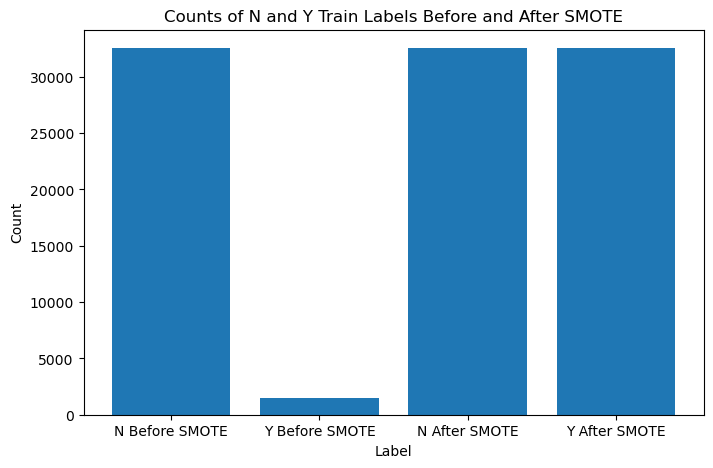

In [291]:
# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(['N Before SMOTE', 'Y Before SMOTE', 'N After SMOTE', 'Y After SMOTE'],
        [n_before_smote[0], n_before_smote[1], n_after_smote[0], n_after_smote[1]])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Counts of N and Y Train Labels Before and After SMOTE')
plt.show()

### SMOTE the test set

In [328]:
# Need to SMOTE the class labels in the y_test set to get a better idea how the model predicts on both classes equally.

# Calculate the number of samples to randomly select from the 'N' class
n_samples = int(0.2 * sum(y_test == 0))

# Randomly select 20% of the 'N' samples
X_test_selected = x_test[y_test == 0].sample(n=n_samples, random_state=42)
y_test_selected = y_test[y_test == 0].sample(n=n_samples, random_state=42)

# Combine the selected 'N' samples and 'Y' samples
X_test_combined = pd.concat([X_test_selected, x_test[y_test == 1]], axis=0)
y_test_combined = pd.concat([y_test_selected, y_test[y_test == 1]], axis=0)

# Perform SMOTE to upsample the 'Y' class to match the number of 'N' samples
sm = SMOTE(sampling_strategy='auto', random_state=8)
X_test1, y_test1 = sm.fit_resample(X_test_combined, y_test_combined)

In [330]:
count_zeros = np.sum(y_test1 == 0)
count_ones = np.sum(y_test1 == 1)

print("Number of 0s in y_test:", count_zeros)
print("Number of 1s in y_test:", count_ones)

Number of 0s in y_test: 55817
Number of 1s in y_test: 55817


# Custom Logistic Regression Model

In [125]:
# Defining the loss function
def loss(h, y1):
    return (-y1 * np.log(h) - (1 - y1) * np.log(1 - h)).mean()

In [236]:
# Defining the sigmoid function
def sigmoid(X1, weight):
    z = np.dot(X1,weight)
    return 1 / (1 + np.exp(-z))

In [128]:
# Defining the gradient descent function
def gradient_descent(X1, h, y1):
    return np.dot(X1.T, (h - y1)) / y1.shape[0]

# Defining the weight update function
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

In [129]:
# Defining the log function
def log_likelihood(X1, y1, weights):
    z = np.dot(X1, weights)
    ll = np.sum( y1*z - np.log(1 + np.exp(z)) )
    return ll

In [143]:
# Define the categorical columns
categorical_columns = asteroid_df1.select_dtypes(include=['category']).columns

# Print the names of categorical columns
print("Categorical columns:")
for column in categorical_columns:
    print(column)

Categorical columns:
pha


### Training

In [313]:
# Record the time taken to complete the training of logistic regression using gradient descent.
start_time = time.time()

num_iter = 10000

intercept = np.ones((X1.shape[0], 1)) 
X1 = np.concatenate((intercept, X1), axis=1)
theta = np.zeros(X1.shape[1])
# Loop through the data and apply the simoid, gradient_descent and weight loss function defined above
for i in range(num_iter):
    h = sigmoid(X1, theta)
    gradient = gradient_descent(X1, h, y1)
    theta = update_weight_loss(theta, 0.1, gradient)
    
print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Training time (Log Reg using Gradient descent):694.1072854995728 seconds
Learning rate: 0.1
Iteration: 10000


In [314]:
# Define the sigmoid function of X1 and theta as 'result'
result = sigmoid(X1, theta)

In [315]:
# Create a new dataframe that includes the true y values and the predicted ones
f = pd.DataFrame(np.around(result, decimals=6)).join(y1)
f['pred'] = f[0].apply(lambda x : 0 if x < 0.5 else 1)

# The predicted values that match the actual values are summed to determine the total correct predictions
correct_predictions = (f['pred'].values == y1).sum()
total_predictions = len(y1)

# Accuracy score
accuracy = (correct_predictions / total_predictions) * 100
print("Accuracy (Loss minimization):", accuracy)

Accuracy (Loss minimization): 98.89661844651249


### Testing

In [338]:
# Add an intercept to x_test
final_intercept = np.ones((X_test1.shape[0], 1))
X_test2 = np.concatenate((final_intercept, X_test1), axis=1)

# Calculate logits
logits = np.dot(X_test2, theta)

# Apply sigmoid to get probabilities
final_predicted_probabilities = sigmoid(X_test2, theta)

# Convert probabilities to binary predictions based on a threshold (0.5)
final_predicted_labels = (final_predicted_probabilities >= 0.5).astype(int)

# Now, `predicted_labels` contains the predicted 0s and 1s for the test data

In [340]:
# Assuming y_test contains the true labels for the test data
final_correct_predictions = (final_predicted_labels == y_test1).sum()
final_total_predictions = len(y_test1)
final_accuracy = (final_correct_predictions / final_total_predictions) * 100
print("Accuracy on Test Data:", final_accuracy)

Accuracy on Test Data: 98.88743572746654


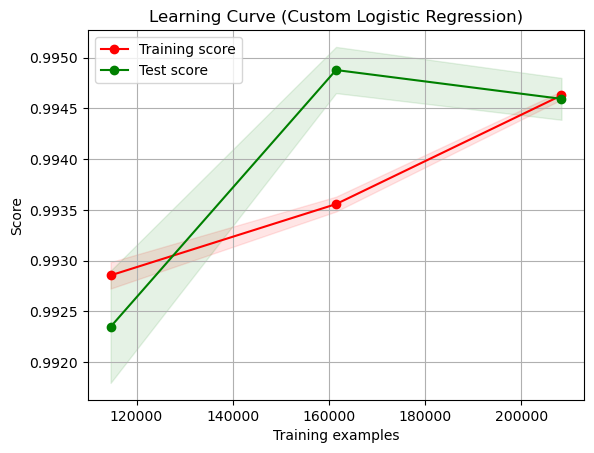

In [376]:
# Create a logistic regression estimator
estimator = LogisticRegression(max_iter=1000)

# Plot learning curves
def plot_learning_curves(estimator, title, X, y, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    return plt

# Example usage:
plot_learning_curves(estimator, "Learning Curve (Custom Logistic Regression)", X1, y1)
plt.show()

# Comparison to Sklearn LogisticRegression Library

### Training

In [366]:
# Define a logistic regression function and fit X1 and y1 to it
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X1, y1)
print("Training time (sklearn's LogisticRegression module):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Training time (sklearn's LogisticRegression module):12039.841628789902 seconds
Learning rate: 0.1
Iteration: 10000


In [367]:
# The predictions of X1 are stored in results2
result2 = clf.predict(X1)

In [368]:
# A new dataframe is created with the actual y values and the predicted ones
f2 = pd.DataFrame(result2).join(y1)

# Accuracy score = ((correct predictions/total predictions) * 100)
accuracy_sklearn = f2.loc[f2[0].values == y1].shape[0] / f2.shape[0] * 100
print("Accuracy (sklearn's Logistic Regression):", accuracy_sklearn)

Accuracy (sklearn's Logistic Regression): 99.47863877883228


### Testing

In [370]:
# Predict on the test data
sklearn_pred = clf.predict(X_test2)

In [372]:
sklearn_test = pd.DataFrame(sklearn_pred).join(y_test1)

In [374]:
# Accuracy score = (correct predictions / total predictions) * 100
accuracy_test = sklearn_test.loc[sklearn_test[0].values == y_test1].shape[0] / sklearn_test.shape[0] * 100
print("Accuracy on Test Set (sklearn's Logistic Regression):", accuracy_test)

Accuracy on Test Set (sklearn's Logistic Regression): 99.45357149255604


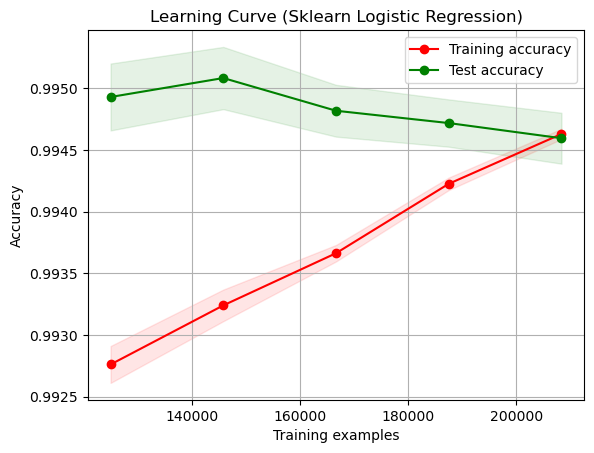

In [377]:
# Define a function to plot learning curves
def plot_learning_curves(estimator, title, X, y, train_sizes, cv=None, scoring=None):
    from sklearn.model_selection import learning_curve

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test accuracy")

    plt.legend(loc="best")
    return plt

# Define a range of training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Create a figure to plot the learning curves
plt = plot_learning_curves(clf, "Learning Curve (Sklearn Logistic Regression)", X1, y1, train_sizes)
plt.show()

# Evaluation

### Custom Model + Sklearn Model

In [170]:
# Custom model 
custom_predictions = f['pred'].values
# Scikit-learn model
sklearn_predictions = f2[0].values

# True labels (y1)
true_labels = y1

# Classification report for the custom model
custom_report = classification_report(true_labels, custom_predictions, target_names=['Class N', 'Class Y'])

# Classification report for the scikit-learn model
sklearn_report = classification_report(true_labels, sklearn_predictions, target_names=['Class N', 'Class Y'])

# Display the classification reports
print("Custom Model Classification Report:")
print(custom_report)

print("\nScikit-learn Model Classification Report:")
print(sklearn_report)

Custom Model Classification Report:
              precision    recall  f1-score   support

     Class N       1.00      0.98      0.99     32559
     Class Y       0.98      1.00      0.99     32559

    accuracy                           0.99     65118
   macro avg       0.99      0.99      0.99     65118
weighted avg       0.99      0.99      0.99     65118


Scikit-learn Model Classification Report:
              precision    recall  f1-score   support

     Class N       1.00      0.99      0.99     32559
     Class Y       0.99      1.00      0.99     32559

    accuracy                           0.99     65118
   macro avg       0.99      0.99      0.99     65118
weighted avg       0.99      0.99      0.99     65118



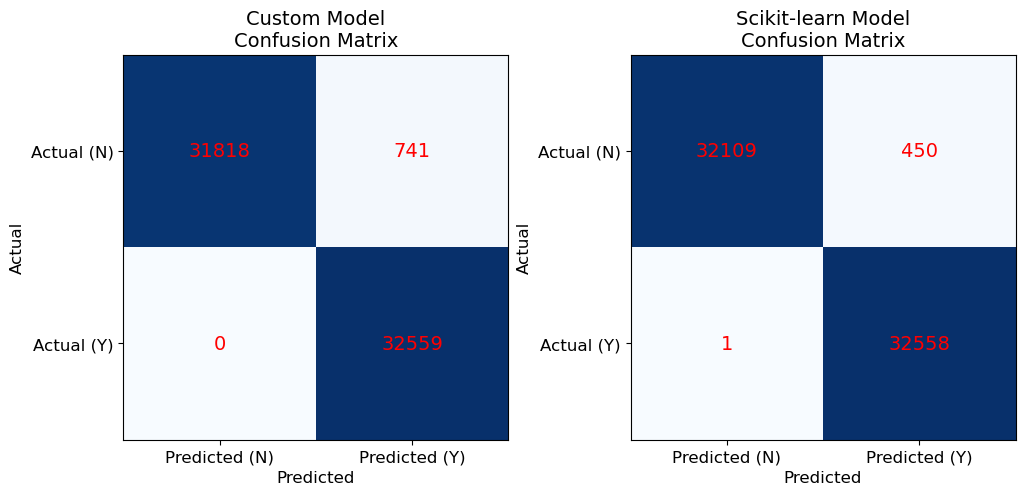

In [169]:
# Confusion matrix for custom model
custom_cm = confusion_matrix(true_labels, custom_predictions)

# Confusion matrix for scikit-learn model
sklearn_cm = confusion_matrix(true_labels, sklearn_predictions)

# Create subplots for confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Custom model confusion matrix
custom_cm_labels = [f"{value}" for value in custom_cm.flatten()]
custom_cm_labels = np.array(custom_cm_labels).reshape(2, 2)

im = axes[0].imshow(custom_cm, cmap='Blues')
for i in range(2):
    for j in range(2):
        text = axes[0].text(j, i, custom_cm_labels[i, j],
                           ha="center", va="center", color="red", fontsize=14)

axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['Predicted (N)', 'Predicted (Y)'], fontsize=12)
axes[0].set_yticklabels(['Actual (N)', 'Actual (Y)'], fontsize=12)
axes[0].set_title('Custom Model\nConfusion Matrix', fontsize=14)
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=12)

# Scikit-learn model confusion matrix
sklearn_cm_labels = [f"{value}" for value in sklearn_cm.flatten()]
sklearn_cm_labels = np.array(sklearn_cm_labels).reshape(2, 2)

im = axes[1].imshow(sklearn_cm, cmap='Blues')
for i in range(2):
    for j in range(2):
        text = axes[1].text(j, i, sklearn_cm_labels[i, j],
                           ha="center", va="center", color="red", fontsize=14)

axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Predicted (N)', 'Predicted (Y)'], fontsize=12)
axes[1].set_yticklabels(['Actual (N)', 'Actual (Y)'], fontsize=12)
axes[1].set_title('Scikit-learn Model\nConfusion Matrix', fontsize=14)
axes[1].set_xlabel('Predicted', fontsize=12)
axes[1].set_ylabel('Actual', fontsize=12)

plt.show()

In [174]:
# Create a dictionary to store all the parmeters of theta from the custom model
custom_model_data = {
    'theta': theta  
}

# Save the custom model
with open('custom_logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(custom_model_data, file)

In [175]:
# Save the sklearn model
with open('sklearn_logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(clf, file)

# Example

In [179]:
# Load the custom model
with open('custom_logistic_regression_model.pkl', 'rb') as file:
    custom_model_data = pickle.load(file)

# Extract model parameters (theta)
theta = custom_model_data['theta']

In [189]:
# Create the new X data
X_input = [0.158, 0.206, 0.946, 0.477, 0.734, 0.301, 0.640, 0.272, 0.816, 0.285, 0.670, 0.945, 0.132, 0.866, 0.123, 0.433, 0.129, 0.140, 0.825, 0.809, 0.567, 0.763, 0.988, 0.170, 0.251, 0.997, 0.377, 0.708, 0.606, 0.211, 0.635, 0.685, 0.759, 0.496, 0.319, 0.693, 0.832, 0.085, 0.979, 0.250, 0.319, 0.710, 0.346, 0.855, 0.482, 0.622, 0.252, 0.299, 0.409, 0.284, 0.588, 0.614, 0.939, 0.237, 0.688, 0.723, 0.567, 0.395, 0.762, 0.943, 0.346, 0.850, 0.237, 0.757, 0.363, 0.871, 0.825, 0.662, 0.693, 0.090, 0.173, 0.871, 0.754, 0.553, 0.753, 0.784, 0.991, 0.352, 0.529, 0.254, 0.147, 0.987, 0.072, 0.863, 0.935, 0.424, 0.261, 0.502, 0.387, 0.532, 0.104, 0.708, 0.536, 0.828, 0.703, 0.623, 0.047, 0.869, 0.347, 0.241, 0.669, 0.506, 0.904, 0.788, 0.694, 0.170, 0.316, 0.750, 0.112, 0.365, 0.463, 0.308, 0.536, 0.511, 0.280, 0.490, 0.818, 0.626, 0.142, 0.170, 0.416, 0.943, 0.661, 0.016, 0.863, 0.131, 0.081, 0.187, 0.272, 0.085, 0.170, 0.236, 0.889, 0.454, 0.153, 0.152, 0.712, 0.966, 0.430, 0.235, 0.585, 0.596, 0.171, 0.690, 0.242, 0.308, 0.255, 0.407, 0.186, 0.329, 0.651, 0.392, 0.358, 0.953, 0.690, 0.600, 0.250, 0.400, 0.131, 0.618, 0.841, 0.442, 0.190, 0.439, 0.748, 0.710, 0.786, 0.423, 0.134, 0.742, 0.464, 0.749, 0.456, 0.841, 0.225, 0.710, 0.943, 0.695, 0.131, 0.779, 0.083, 0.290, 0.420, 0.276, 0.732, 0.773, 0.450, 0.734, 0.477, 0.091, 0.342, 0.621, 0.680, 0.951, 0.491, 0.979, 0.178, 0.800, 0.722, 0.590, 0.583, 0.580, 0.177, 0.232, 0.268, 0.777, 0.745, 0.291, 0.738, 0.259, 0.104, 0.828, 0.098, 0.422, 0.162, 0.697, 0.201, 0.809, 0.660, 0.444, 0.988, 0.364, 0.361, 0.617, 0.873, 0.217, 0.138, 0.055, 0.752, 0.261, 0.215, 0.498, 0.965, 0.239, 0.551, 0.516, 0.653, 0.951, 0.057, 0.331, 0.097, 0.145, 0.945]

# Convert X_input and theta to NumPy arrays
X_input = np.array(X_input)

theta = np.array(theta)

# Calculate the dot product
sigmoid_output = 1 / (1 + np.exp(-X_input.dot(theta)))

# Choose a threshold 
threshold = 0.5

# Make predictions based on the threshold
predictions = (sigmoid_output >= threshold).astype(int)

In [213]:
print('Custom model prediction:', predictions)

Custom model prediction: [0]


In [203]:
# Calculate the model's confidence (probability of the positive class)
model_confidence = sigmoid_output
confidence_of_correct_class = 1 - sigmoid_output
print('Confidence of model predicting the correct class:', confidence_of_correct_class)
print('Confidence of model predicting the incorrect class:', model_confidence)

Confidence of model predicting the correct class: 0.9692988603748744
Confidence of model predicting the incorrect class: 0.03070113962512556


<div style="background-color: #E6E6FA; padding: 10px;">
  Therefore, the prediction made on the random unseen data is 0 (N), meaning that the asteroid is likely not hazardous. The percentage of certainty is 96.9% of predicting it correctly.
</div>